In [1]:
import numpy as np #匯入numpy模組，NumPy是Python語言的擴充程式庫。支援維度陣列與矩陣運算
import pandas as pd 
from keras.utils import np_utils #匯入keras.utils因為後續要將label標籤轉換為One-hotencoding
np.random.seed(10) #設定seed可以讓每次需要隨機產生的資料，都有相同的輸出

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Loading dataset
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data() # (60000, 28, 28), (60000, )

In [5]:
x_train_image = x_train_image[:1000]/256
x_test_image = x_test_image/256
y_train_label = y_train_label[:1000]

In [6]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

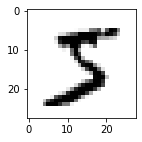

In [7]:
plot_image(x_train_image[0])

In [8]:
U, S, V = [], [], [] # init

# for each digit from 0~9
for i in range(10):
    # Stacking all the columns of each image of the digit i: (n_i, 28, 28) -> (n_i, 28*28), where n_i is the #of training digit i 
    imat = x_train_image[y_train_label==i].reshape((-1, 28*28)).T
    # Applying the SVD to matrix representation of digit i
    Ui, si, Vi = np.linalg.svd(imat)
    # Appending the left singular matrix to U
    U.append(Ui)
    S.append(si)
    V.append(Vi)


In [9]:
def classification(img_num, k=15, plot=True):
    if plot:
        plot_image(x_test_image[img_num])
    z = x_test_image[img_num].reshape(-1)
    residual = [np.linalg.norm(np.dot( (np.identity(784) - np.dot(U[i][:k].T, U[i][:k])), z )) for i in range(10)]
    result = np.argmin(residual)
#     print("The classify result is: {}".format(result))
    return result

# print("The correct answer is: {}".format(y_test_label[img_num]))

In [10]:
allr = [classification(i, plot=False) for i in range(10000)]

In [12]:
sum(allr == y_test_label)/10000 # accuracy

0.8229

## appendix

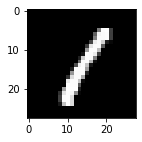

In [272]:
# the "singular image" of digit i
plot_image(U[0].reshape(28, 28))